In [1]:
# Housing data ML flow

In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn import preprocessing

print("Done")

Done


In [4]:
uri = "../datasets/housing.csv"


In [5]:
df = pd.read_csv(uri)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
pd.pivot_table(df, index=["ocean_proximity"], values=["total_rooms", "total_bedrooms"], aggfunc="count")

,total_bedrooms,total_rooms
ocean_proximity,,
<1H OCEAN,9034,9136
INLAND,6496,6551
ISLAND,5,5
NEAR BAY,2270,2290
NEAR OCEAN,2628,2658


In [9]:
# total_bedrooms has some null values (20433 vs 20640)
df["total_bedrooms"].isnull().sum()

207

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
# Null values are ignored in the describe method 
# the count shows individual values 


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

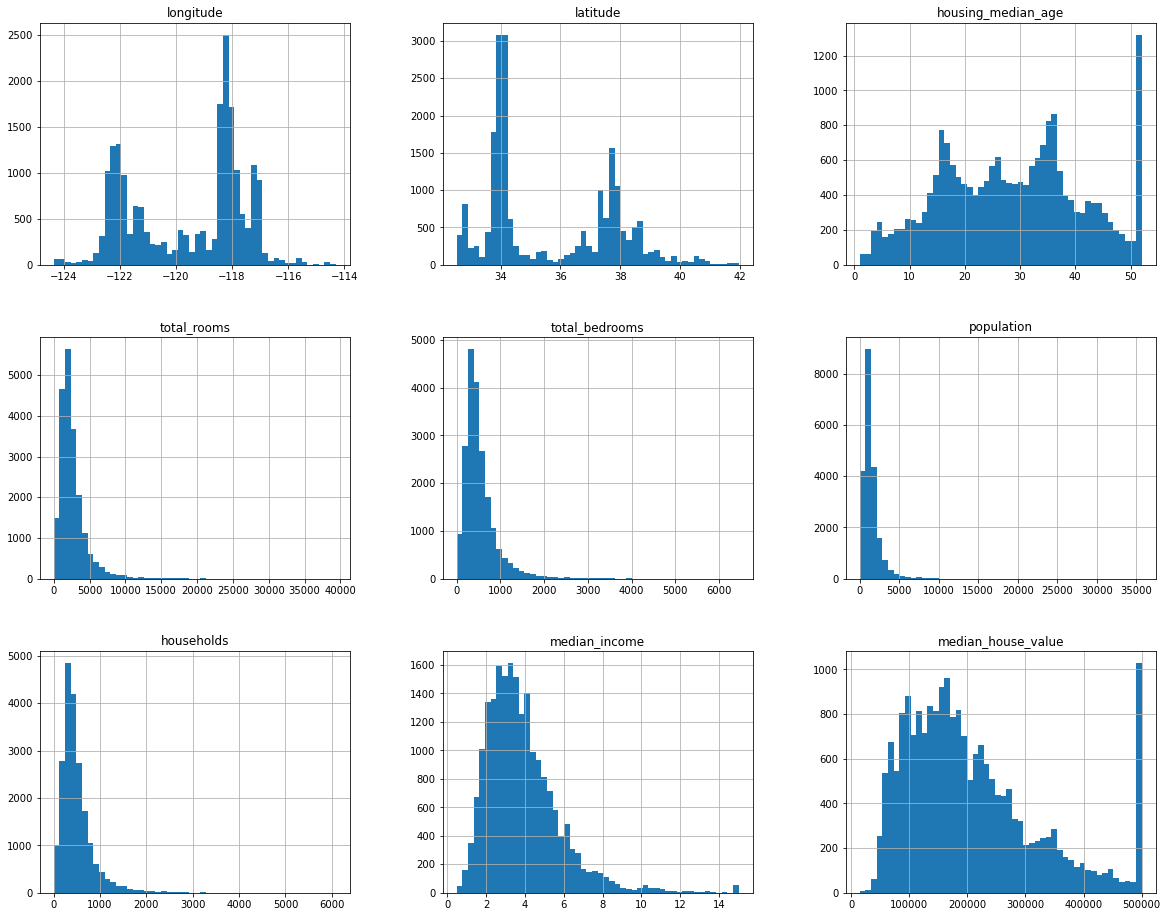

In [12]:
df.hist(bins=50, figsize=(20,16))

<AxesSubplot:>

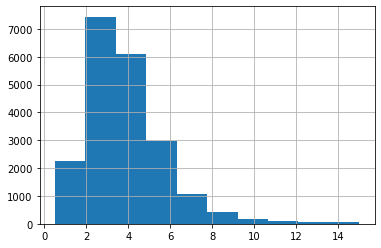

In [13]:
df["median_income"].hist()

In [14]:
# results from the histograms show different 

In [15]:
# Slipt your data into training and test groups

In [100]:
# remove NaN values before spliting 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [101]:
df.dropna(inplace=True)

In [102]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [103]:
print(len(train_set))
print(len(test_set))

16346
4087


In [104]:
# After splitting the dataset, EDA can continue  

In [105]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [106]:
# create an inccome category and make histogram 
print(df["median_income"].unique())
df["income_cat"] = pd.cut(df["median_income"], bins=[0,1.5,3.0,4.5,6, np.inf], labels=[1,2,3,4,5] )

[8.3252 8.3014 7.2574 ... 2.3598 2.3661 2.0943]


<AxesSubplot:>

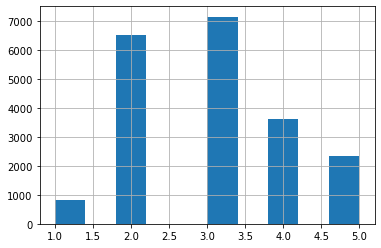

In [107]:
df.income_cat.hist()

In [108]:
# References
# Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [109]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([19391,  3778, 19959,  2115,  4186,\n            ...\n            10428, 13336, 13015, 16757,  9970],\n           dtype='int64', length=171). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [110]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [111]:
# this give the income cat proportions (% per 100%)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [112]:
# Decision tree modeling 

In [113]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,<1H OCEAN,4
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,INLAND,3
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,INLAND,3
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,<1H OCEAN,2
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,<1H OCEAN,4
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,<1H OCEAN,4
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,<1H OCEAN,3
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,NEAR BAY,4


In [114]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0,NEAR OCEAN,3
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0,INLAND,3
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0,<1H OCEAN,3
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0,NEAR BAY,2
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,500001.0,NEAR OCEAN,3
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,157900.0,<1H OCEAN,3
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,100200.0,INLAND,2
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,127700.0,INLAND,3


# Use train set to 
1. predict house prices based on feature columns 
2. test the model with the test set 
3. validate the model 

In [115]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [116]:
# features of interest 
# housing_median_age, total_rooms, total_bedrooms, households, median_income, 

In [117]:
# check for null values 
train_set.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

In [118]:
# prediction target 
y = train_set.median_house_value

In [119]:
# Features 
features_list = ["housing_median_age", "total_rooms", "total_bedrooms", "households", "median_income"]
X = train_set[features_list]

In [120]:
X

,housing_median_age,total_rooms,total_bedrooms,households,median_income
17727,14.0,4412.0,924.0,891.0,4.7027
2057,33.0,1036.0,181.0,174.0,3.4107
6453,25.0,3891.0,848.0,759.0,3.6639
4619,28.0,2362.0,949.0,894.0,2.2364
15266,27.0,1839.0,392.0,404.0,3.5500
...,...,...,...,...,...
11397,24.0,2991.0,500.0,453.0,5.4286
12081,5.0,5846.0,1035.0,1001.0,4.7965
5447,42.0,1594.0,369.0,362.0,3.0990
866,12.0,5719.0,1064.0,1057.0,5.2879


In [121]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=2)

In [122]:
model.fit(X, y)

DecisionTreeRegressor(random_state=2)

In [123]:
# testing the model 
# will use new data in the next step
print("making predictions for 5 houses")
print(X.head())
print("the predictions are")
print(model.predict(X.head()))
print("-" * 30)
print(y.head(), model.predict(X.head()))

making predictions for 5 houses
       housing_median_age  total_rooms  total_bedrooms  households  \
17727                14.0       4412.0           924.0       891.0   
2057                 33.0       1036.0           181.0       174.0   
6453                 25.0       3891.0           848.0       759.0   
4619                 28.0       2362.0           949.0       894.0   
15266                27.0       1839.0           392.0       404.0   

       median_income  
17727         4.7027  
2057          3.4107  
6453          3.6639  
4619          2.2364  
15266         3.5500  
the predictions are
[227600. 110400. 248100. 305600. 214600.]
------------------------------
17727    227600.0
2057     110400.0
6453     248100.0
4619     305600.0
15266    214600.0
Name: median_house_value, dtype: float64 [227600. 110400. 248100. 305600. 214600.]


## model validation with old data from train set 

In [124]:
predicted_model = model.predict(X)

In [125]:
# use metrics to determine accuracy
# mae = mean absolute error
# mse = mean square error 
# rmse = root mean square error

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, predicted_model)
mse = mean_squared_error(y, predicted_model)
rmse = np.sqrt(mse)

In [127]:
print(mae, mse, rmse)

0.0 0.0 0.0


In [128]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
housing_model = DecisionTreeRegressor()
# Fit model
housing_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = housing_model.predict(val_X)
print("MAE:", mean_absolute_error(val_y, val_predictions))
print("MSE:", mean_squared_error(val_y, val_predictions))
print("RMSE:", np.sqrt(mean_squared_error(val_y, val_predictions)))

MAE: 71714.83508686078
MSE: 10024778637.933203
RMSE: 100123.81653699186


The values for MAE and RMSE can be improved by a couple of processes

In [129]:
print(pd.DataFrame(val_predictions).head())
print(pd.DataFrame(val_y).head())

          0
0  358800.0
1  230000.0
2  146300.0
3  195900.0
4   78100.0
       median_house_value
10581            272800.0
15924            267200.0
4436             173200.0
14710            268300.0
193              112500.0


In [130]:
# inspecting the first 5 predictions...


In [131]:
# Essential libs
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [132]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
print(scores)
print(best_tree_size)

{5: 63886.20286521927, 25: 57357.77029682684, 50: 56534.39802214778, 100: 55751.446988944845, 250: 56441.40540029621, 500: 58000.02077929494}
100


In [133]:
## You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size. 
## That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [134]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [135]:
test_final_X = test_set[features_list]
test_final_y = test_set.median_house_value

print(test_final_X.isnull().sum())
print(test_final_y.isnull().sum())

housing_median_age    0
total_rooms           0
total_bedrooms        0
households            0
median_income         0
dtype: int64
0


In [136]:
predictions_final = final_model.predict(test_final_X)

In [137]:
print(test_final_y, predictions_final)

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
8291     500001.0
6274     157900.0
2997     100200.0
13440    127700.0
14797    133700.0
Name: median_house_value, Length: 4087, dtype: float64 [164269.48006135 192161.21720733 223167.76973684 ... 150286.74157303
 157714.28571429 122928.20512821]


# new data from the test set seems to be way off!